In [50]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost request


ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request


In [51]:
!pip install requests


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing  
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
import requests




In [53]:
house_data = fetch_california_housing()
print(house_data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset

In [54]:
dataframe=pd.DataFrame(house_data.data,columns=house_data.feature_names)
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [55]:
dataframe['price']= house_data.target
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [56]:
dataframe.shape

(20640, 9)

In [57]:
dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [58]:
dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [59]:
correlation=dataframe.corr()
correlation.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650


<Axes: >

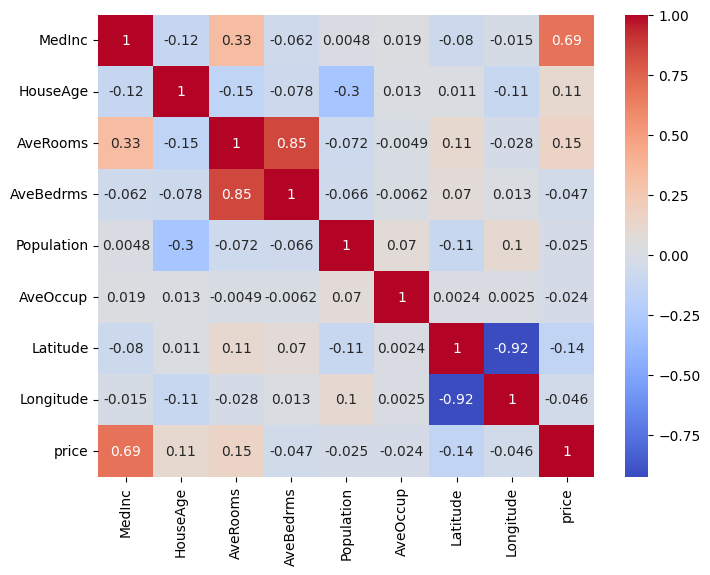

In [60]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation, annot=True, cmap='coolwarm') 

In [61]:
x=dataframe.drop(['price'],axis=1)
y=dataframe['price']
print(x)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=4)

In [63]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)


(20640, 8) (12384, 8) (8256, 8)
(20640,) (12384,) (8256,)


In [64]:
training_model=XGBRegressor()

In [65]:
training_model.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [66]:
training_model_prediction=training_model.predict(x_train)

In [67]:
print(training_model_prediction)

[1.1883541  0.82739747 3.4956295  ... 2.588711   1.6209155  1.6460993 ]


In [68]:
score1=metrics.r2_score(y_train,training_model_prediction )
score2=metrics.mean_absolute_error(y_train,training_model_prediction )
print(" r square error is ",score1)
print(" absolute error is ",score2)



 r square error is  0.9536496638071502
 absolute error is  0.17404938698636238


In [69]:
testing_model_prediction=training_model.predict(x_test)
print(testing_model_prediction)

[1.6475344 2.5408452 1.1289552 ... 1.8140423 1.9425257 1.5176718]


In [70]:
score1=metrics.r2_score(y_test,testing_model_prediction )
score2=metrics.mean_absolute_error(y_test,testing_model_prediction )
print(" r square error is ",score1)
print(" absolute error is ",score2)

 r square error is  0.8286947901081929
 absolute error is  0.31564493857585413


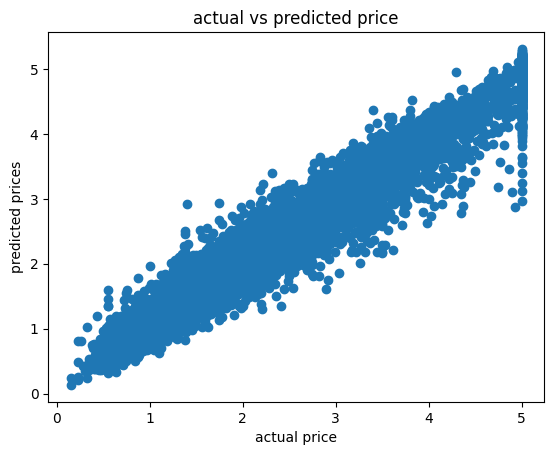

In [71]:
plt.scatter(y_train,training_model_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted prices")
plt.title("actual vs predicted price")
plt.show()

In [72]:
print(x.columns)  

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [73]:
medinc=int(input("enter medinc"))
houseage=int(input("enter houseage"))
avgrooms=int(input("enter avgrooms"))
avgbedrooms=int(input("enter avgbedrooms"))
population=int(input("enter population"))
avgoccupany=int(input("enter avgoccupany"))
latitute=int(input("enter latitute"))
longitute=int(input("enter longitute"))




new_data = [[medinc,houseage,avgrooms,avgbedrooms,population,avgoccupany,latitute,longitute]]

predicted_price = training_model.predict(new_data)[0] 

def get_live_usd_to_inr():
    url = "https://api.exchangerate-api.com/v4/latest/USD"  
    try:
        response = requests.get(url)
        data = response.json()
        return data['rates']['INR']
    except Exception as e:
        print("Error fetching exchange rate:", e)
        return 83.0  #
def convert_to_price(predicted_price, exchange_rate_inr):
    usd = predicted_price * 100000
    inr = usd * exchange_rate_inr
    return round(usd, 2), round(inr, 2)

exchange_rate = get_live_usd_to_inr()
usd, inr = convert_to_price(predicted_price, exchange_rate)

print("House Price in USD: $", usd)
print("House Price in INR: ₹", inr)
print("Live USD to INR rate used:", exchange_rate)


ValueError: invalid literal for int() with base 10: ''

In [ ]:
'''import pickle

filename = "trained_model.sav"
pickle.dump(training_model, open(filename, 'wb'))
print("Model saved as", filename)'''

Model saved as trained_model.sav


In [ ]:
import pickle

filename = 'trained_model.sav'
with open(filename, 'wb') as file:
    pickle.dump(training_model, file)

print("Model saved as 'trained_model.sav'")


Model saved as 'trained_model.sav'
